# 04. Pauli 门 & Hadamard 门

对于一个单量子门 $\mathcal{U}$ ，其作用效果如下：
$$
\begin{align*}
\mathcal{U} |0\rangle 
& = \alpha |0\rangle + \beta |1\rangle 
\equiv |\phi\rangle \\
\mathcal{U} |1\rangle
& = \alpha' |0\rangle + \beta' |1\rangle
\equiv |\phi_\bot\rangle
\end{align*}
$$

如何写出 $\mathcal{U}$ 的矩阵？
$$\begin{align*}  \mathcal{U}  & = \mathcal{U} I \\  & = \mathcal{U} \left|0\right> \langle0| + \mathcal{U} |1\rangle \langle 1|\\  & = \left( \alpha |0\rangle + \beta |1\rangle \right) \langle 0 | + \left( \alpha' |0\rangle + \beta' |1\rangle \right) \langle 1 | \\  & = \begin{pmatrix} \alpha \\ \beta \end{pmatrix} \langle 0| + \begin{pmatrix} \alpha' \\ \beta' \end{pmatrix} \langle 1| \\  & = \begin{pmatrix}  \alpha & \alpha' \\  \beta & \beta'  \end{pmatrix} \end{align*}$$

注意到
$$
0 = \langle 0 | 1 \rangle
= \langle 0 | \mathcal{U}^\dagger \mathcal{U} |1\rangle
= \langle \phi | \phi_\bot \rangle
= \alpha^* \alpha' + \beta^* \beta'
$$
因此 $\mathcal{U}$ 是一个**酉矩阵**。


# Pauli门

前面我们已经简单认识了 Pauli-`X` 门。实际上总共有 3 种 Pauli 门： $X, Y, Z$，它们的作用效果如下：
$$
\begin{align*}
X |0\rangle = |1\rangle , \quad & X |1\rangle = |0\rangle \\
Y |0\rangle = i |1\rangle , \quad & Y |1\rangle = -i |0\rangle \\
Z |0\rangle = |0\rangle  , \quad & Z |1\rangle = - |1\rangle
\end{align*}
$$

因此 $X, Y, Z$ 的矩阵如下：
$$
\begin{align*}
X & = 
\begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}
\\
Y & = 
\begin{pmatrix}
0 & -i \\
i & 0
\end{pmatrix}
\\
Z & =
\begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}
\end{align*}
$$

In [1]:
from mindquantum.core.gates import X, Y, Z

print("X:")
print(X.matrix())
print("Y:")
print(Y.matrix())
print("Z:")
print(Z.matrix())

X:
[[0 1]
 [1 0]]
Y:
[[ 0.+0.j -0.-1.j]
 [ 0.+1.j  0.+0.j]]
Z:
[[ 1  0]
 [ 0 -1]]


> API 解释：
> 
> MindQuantum 中大部份量子门都继承自 `BasicGate` 类，这个类有一个接口 `.matrix()` 返回门的矩阵形式（`numpy` 二维数组）。

Pauli门具有如下的性质：
$$
\begin{align*}
X^2 = Y^2 = Z^2 = I \\
XYZ = iI\\
XY = iZ \\
YZ = iX \\
ZX = iY
\end{align*}
$$

In [2]:
from mindquantum.core.gates import X,Y,Z
import numpy as np

x = X.matrix()
y = Y.matrix()
z = Z.matrix()

print("X^2 = I : ", np.allclose(x @ x, np.identity(2)))
print("Y^2 = I : ", np.allclose(y @ y, np.identity(2)))
print("Z^2 = I : ", np.allclose(z @ z, np.identity(2)))

print("XYZ = iI : ", np.allclose(x @ y @ z, 1j * np.identity(2)))

X^2 = I :  True
Y^2 = I :  True
Z^2 = I :  True
XYZ = iI :  True


> API 解释：
> 
> 在量子计算中我们常常需要证明一些**恒等式**（线路等价性），除了拿起笔手动推导，我们可以利用计算机方便的证明这些恒等式。例如直接计算矩阵乘法，比较等式两端的计算结果。
> 在 `numpy` 中 `A` 和 `B` 矩阵乘法可以用
>   
>   - `A.dot(B)`
>   - `A @ B`
>   - `np.dot(A, B)`
>   - `np.matmul(A, B)`
> 
> 注意不要使用 `A * B` 和 `A.multiply(B)`，其含义是矩阵对应位置相乘。
>  
> 对比两个矩阵相等建议使用 `np.allclose(A, B)`，因为浮点数计算存在误差，该函数是在误差范围内比较两个矩阵。 

# Hadamard 门

几乎所有量子电路都有 Hadamard 门：
$$
H \equiv \frac{1}{\sqrt{2}}\left(\begin{array}{cc}
1 & 1 \\
1 & -1
\end{array}\right)=\frac{1}{\sqrt{2}}\left(\begin{array}{l}
1 \\
1
\end{array}\right)\langle 0|+\frac{1}{\sqrt{2}}\left(\begin{array}{c}
1 \\
-1
\end{array}\right)\langle 1|
$$
其中
$$
H|0\rangle=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) \quad, H|1\rangle=\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)
$$

注意到 $H$ 也是自逆的，即 $H^2=I$，并且 $H=(X+Z)/\sqrt{2}$。

以下是一些 Hadamard 门的性质：
$$
HXH=Z, \quad HZH=X, \quad HYH=-Y
$$

例如，$HR_x(\theta)H=Icos\frac{\theta}{2}-iHXHsin\frac{\theta}{2}=R_z(\theta)$。

最后我们还需要知道另外两个单比特门：
$$
S \equiv\left(\begin{array}{ll}
1 & 0 \\
0 & i
\end{array}\right) \quad, \quad T \equiv\left(\begin{array}{cc}
1 & 0 \\
0 & e^{i \pi / 4}
\end{array}\right)
$$
并且有$S=T^2$。

实际上，在实验室中，人们可能不具备从任意方向控制量子比特旋转的能力。比如说，如果我们只能实现$R_z$和$R_y$该怎么办？

在 MindQuantum 中也有 `H` , `S` 和 `T` 门，使用方法如下：

In [3]:
from mindquantum.core.gates import H, S, T
from mindquantum.core.circuit import Circuit

circ = Circuit()
circ += H.on(0)
circ += S.on(1)
circ += T.on(1)
print(circ)

      ┏━━━┓         
q0: ──┨ H ┠─────────
      ┗━━━┛         
      ┏━━━┓ ┏━━━┓   
q1: ──┨ S ┠─┨ T ┠───
      ┗━━━┛ ┗━━━┛   


## 在其它基矢下的测量

前面提到，我们可以在标准基$\lbrace|0\rangle, |1\rangle \rbrace$下对量子比特进行测量，得到 0 或 1。除了标准基，还有一组经常使用的基，它对应 $x$ 轴方向上的测量
$$|\pm\rangle = \frac{|0\rangle \pm |1\rangle}{\sqrt{}2}$$

可以使用Hadmard门来得到这两个量子态：
$$H\equiv
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix} \\
H|0\rangle = |+\rangle, \quad H|1\rangle = |-\rangle
$$


In [4]:
from mindquantum.simulator import Simulator
from mindquantum.core.gates import H, X

sim = Simulator("mqvector", 1)

sim.reset()
sim.apply_gate(H.on(0))
print("|+⟩: ", sim.get_qs())

sim.reset()
sim.apply_gate(X.on(0))
sim.apply_gate(H.on(0))
print("|-⟩: ", sim.get_qs())

|+⟩:  [0.70710678+0.j 0.70710678+0.j]
|-⟩:  [ 0.70710678+0.j -0.70710678+0.j]


> API 解释：
> 
> - `sim.reset()` 将模拟器 `sim` 的量子态重置为 $|0\rangle^{\otimes n}$ 态，其中 $n$ 表示模拟器的量子比特数目；
> - `sim.apply_gate(H.on(0))` 将模拟器 `sim` 的量子态 第0个比特作用 H 门，注意 `apply_gate` 和 `apply_circuit` 都会**改变量子态**；

由于mindquantum的测量都是在标准基下进行的，想要在 $\lbrace |+\rangle, |-\rangle\rbrace$ 下测量，需要使用H门进行转换。
$$
\begin{align*}
|\psi\rangle & = \alpha |+\rangle + \beta |-\rangle \\
H |\psi\rangle & = \alpha |0\rangle + \beta |1\rangle
\end{align*}
$$

对 $|+\rangle$ 沿着 $x$ 轴（使用 $\lbrace |\pm\rangle \rbrace$）进行测量，测量结果总是 $0$；如果使用 $z$ 轴（标准基 $\lbrace |0\rangle, |1\rangle \rbrace$）进行测量，测量结果是 $0$ 和 $1$ 的随机字符串，例如 $01010001100111\ldots$ 。

|+⟩:  [0.70710678+0.j 0.70710678+0.j]


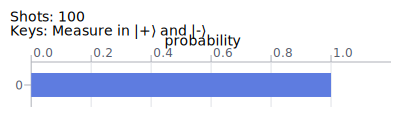

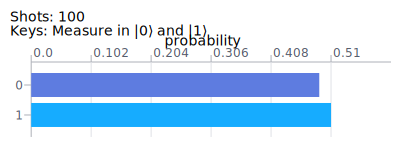

In [5]:
from mindquantum.simulator import Simulator
from mindquantum.core.gates import H, Measure
from mindquantum.core.circuit import Circuit
from IPython.display import display_svg

sim = Simulator("mqvector", 1)

sim.reset()
sim.apply_gate(H.on(0))
print("|+⟩: ", sim.get_qs())

# using |+⟩ and |-⟩ to measure
circ = Circuit()
circ += H.on(0)
circ += Measure("Measure in |+⟩ and |-⟩").on(0)
res = sim.sampling(circuit=circ, shots=100)
display_svg(res.svg())

# using |0⟩ and |1⟩ to measure
circ = Circuit()
circ += Measure("Measure in |0⟩ and |1⟩").on(0)
res = sim.sampling(circuit=circ, shots=100)
res.svg()

In [6]:
from show_info import InfoTable

InfoTable('mindquantum', 'matplotlib', 'numpy')

# 习题

## Exercise 1

我们定义 $[A, B] = AB - BA$，$\lbrace A,B \rbrace = AB + BA$，$\vec{\sigma} = (\sigma_1, \sigma_2, \sigma_3) = (X, Y, Z)$，验证

$$
\lbrace \sigma_i, \sigma_j \rbrace = 2\delta_{i,j} I = \begin{cases} 2I \quad & i = j \\ 0 \quad & i \neq j \end{cases}
$$

## Exercise 2

请用 MindQuantum 验证下式是否成立
$$
H|0\rangle=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) \quad, H|1\rangle=\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)
$$

## Exercise 3

请用 MindQuantum 验证下式是否成立
$$
HR_x(\theta)H=R_z(\theta)
$$

## Exercise 4

对 $|\psi\rangle = \frac{|0\rangle + (1+i)|1\rangle}{\sqrt{3}}$ 使用 $\lbrace |+\rangle, |-\rangle\rbrace$ 进行测量。